
## **Task_1**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Fake news Detection

### Importing Modules

In [3]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations 
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

### Reading two  data files 
### Download this dataset from
https://www.kaggle.com/code/therealsampat/fake-news-detection/data

In [4]:
data_true=pd.read_csv("/content/drive/MyDrive/AI MASTER CLASS/DATASET/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/AI MASTER CLASS/DATASET/Fake.csv")

#### Printing top 5 values from both Dataset 

In [5]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### Checking size of Datasets 

In [7]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

### Adding column name "class" in both datasets

In [8]:
data_true["class"]=1
data_fake["class"]=0

###  Taking last 10 values for manual testing from both Datasets 

In [9]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset
    
data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

### merging these two datasets in single dataframe

In [10]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

### Merging main two datasets

In [11]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Performing some basic data visualizations

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


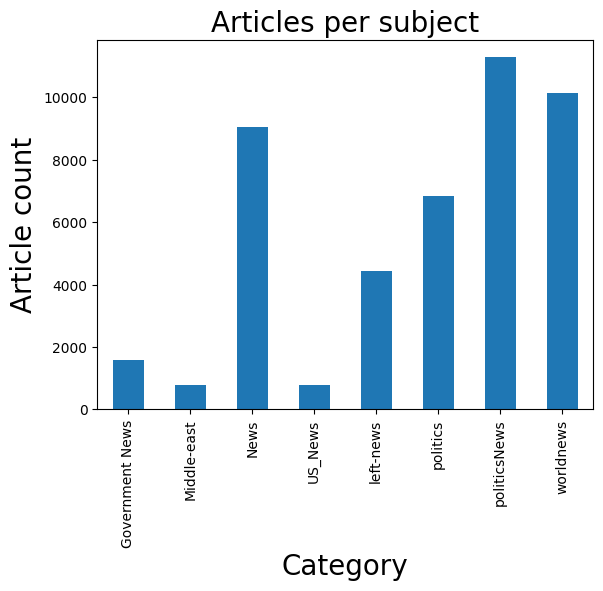

In [12]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


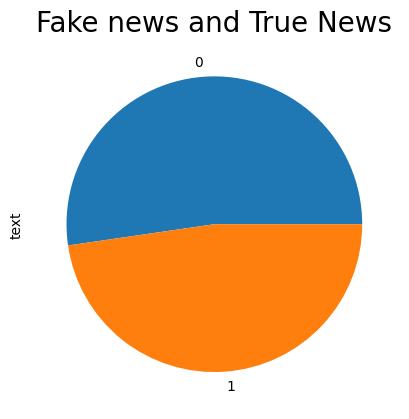

In [13]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

### Removing 3 columns from dataset 

In [14]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset 

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


### Shuffling the dataset for better prediction

In [15]:
data=data.sample(frac=1)
data.head(10)

,text,class
12236,Kellyanne Conway: I think the biggest fake n...,0
10220,Many on the left and in the liberal media are ...,0
12643,JAKARTA (Reuters) - Thousands protested outsid...,1
5511,"In constructing the 2016 Republican platform, ...",0
19574,,0
1315,Some of the biggest corporations in the United...,0
11427,,0
5924,"PARIS (Reuters) - France, Germany and Luxembou...",1
18973,BERLIN (Reuters) - French President Emmanuel M...,1
4779,"In an appearance on NBC s Meet the Press, Mi...",0


### Checking for null values in dataset

In [16]:
data.isnull().sum()

text     0
class    0
dtype: int64

### Creating data filtering function to remove unwanted data from text

In [17]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

### Filtering data of our text column using above function

In [18]:
data["text"]= data["text"].apply(filtering)
data.head(10)

,text,class
12236,kellyanne conway i think the biggest fake n...,0
10220,many on the left and in the liberal media are ...,0
12643,jakarta reuters thousands protested outsid...,1
5511,in constructing the republican platform dele...,0
19574,,0
1315,some of the biggest corporations in the united...,0
11427,,0
5924,paris reuters france germany and luxembou...,1
18973,berlin reuters french president emmanuel m...,1
4779,in an appearance on nbc s meet the press mi...,0


### Creating Dependant and independant variables 

In [19]:
x=data["text"]
y=data["class"]

### Spliting dataset for training and testing purpose 

In [20]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

### Vectorizing the text
#### The sklearn. feature_extraction module is used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vector = TfidfVectorizer() # creating object 
#Learn vocabulary and IDF(inverse document frequency), return document-term matrix. 
#IDF returns numerical statics that how the word is important to the document
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

## Classifaction using various classifers

### Logictic Regression
#### Calculating probability of event occurence 

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR=LogisticRegression()
LR.fit(xv_train,y_train) #training or fitting the model to the training set

LogisticRegression()

In [25]:
LR.score(xv_test,y_test).round(2) # method computes the accuracy score

0.99

In [26]:
pred_LR= LR.predict(xv_test) # Predict using the linear model

In [27]:
print(classification_report(y_test,pred_LR)) #creating classification report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5850
           1       0.99      0.99      0.99      5370

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Creating confusion matrix
#### determine the performance of the classification models for a given set of test data.

[[5780   70]
 [  61 5309]]


<Axes: >

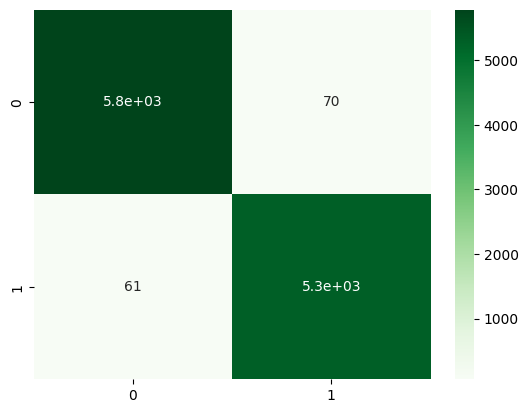

In [28]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,pred_LR)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True)


### Decision Tree Classification 

#### Non-parametric supervised learning method used for both classification and regression tasks.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [31]:
DT.score(xv_test,y_test).round(2)

1.0

In [32]:
pred_DT = DT.predict(xv_test)

In [33]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5850
           1       1.00      0.99      1.00      5370

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5828   22]
 [  30 5340]]


<Axes: >

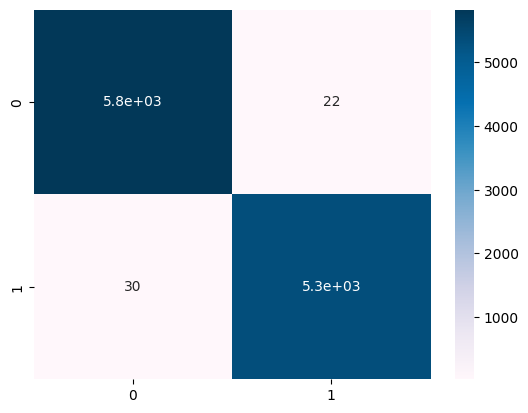

In [34]:
cm= confusion_matrix(y_test,pred_DT)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PuBu",annot=True)

### Gradient Boosting Classifier

#### It is a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [37]:
GBC.score(xv_test,y_test)

0.9955436720142602

In [38]:
pred_GBC = GBC.predict(xv_test)

In [39]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5850
           1       0.99      1.00      1.00      5370

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5815   35]
 [  15 5355]]


<Axes: >

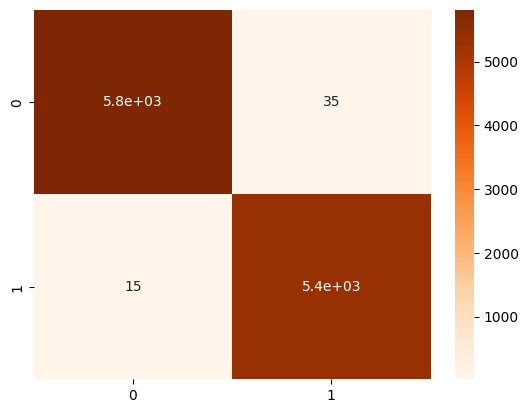

In [40]:
cm= confusion_matrix(y_test,pred_GBC)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Oranges",annot=True)

### Random Forest Classifier

#### Supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [43]:
RFC.score(xv_test,y_test)

0.9921568627450981

In [44]:
pred_RFC = RFC.predict(xv_test)

In [45]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5850
           1       0.99      0.99      0.99      5370

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5814   36]
 [  52 5318]]


<Axes: >

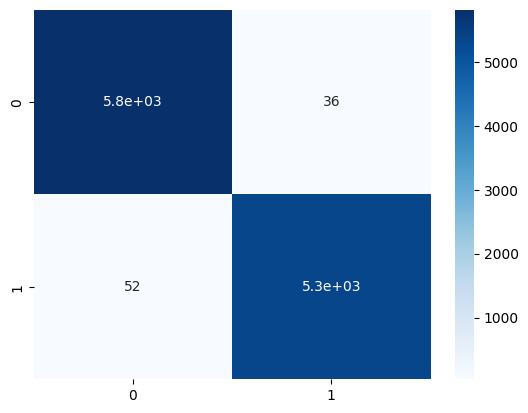

In [46]:
cm= confusion_matrix(y_test,pred_RFC)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

## Manual Testing

In [47]:
def output_lable(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering) 
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]))) 
     

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have decided to stay in the United States, ABC reported, with some moving in with their families. However it is not known where the other four are.Three of the Americans who had been detained in Iran   Washington Post journalist Jason Rezaian, former U.S. Marine Amir Hekmati and Christian pastor Saeed Abedini   left Tehran at around 7am the same day, but weren t met by their counterparts in Switzerland Continue this story at the Mail OnlineREAD MORE IRAN NEWS AT: 21st Century Wire Iran Files


In [58]:
news = str(input())
manual_testing(news)

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange with at least 3 electing to stay in the U.S TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have decide